In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['legend.fontsize'] = 8

In [11]:
df_user = pd.read_csv('../data/user_knowledge_preprocessed.csv')
numerical_col_user = ['STG','SCG','STR','LPR','PEG']
mapping = { 1: 'Very low', 
            2: 'Low',
            3: 'Middle',
            4: 'High' }
df_user['UNS'] =df_user['UNS'].map(mapping)
df_user.tail()

STG   SCG   STR   LPR   PEG     UNS
398  0.90  0.78  0.62  0.32  0.89    High
399  0.85  0.82  0.66  0.83  0.83    High
400  0.56  0.60  0.77  0.13  0.32     Low
401  0.66  0.68  0.81  0.57  0.57  Middle
402  0.68  0.64  0.79  0.97  0.24  Middle

Text(0.5, 0, 'Степень')

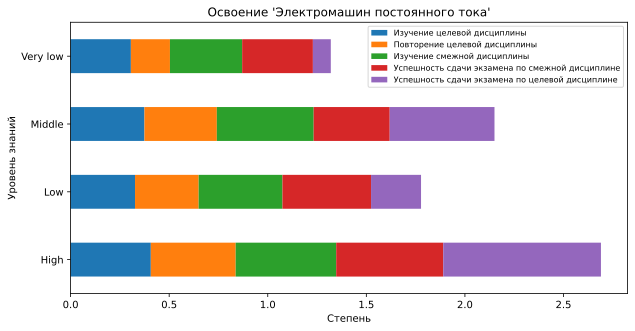

In [6]:
ax = df_user.groupby('UNS').mean().plot(kind='barh', rot = 0, stacked = True)
ax.legend(['Изучение целевой дисциплины','Повторение целевой дисциплины','Изучение смежной дисциплины','Успешность сдачи экзамена по смежной дисциплине','Успешность сдачи экзамена по целевой дисциплине'])
plt.title("Освоение 'Электромашин постоянного тока'")
plt.ylabel("Уровень знаний")
plt.xlabel("Степень")

По результату на графике можно сделать вывод, что для глубокого понимания целевой дисциплины необходимо в равной степени и в достаточном количестве уделять силы и время как на изучение смежной дисциплины, так и на повторение целевой.

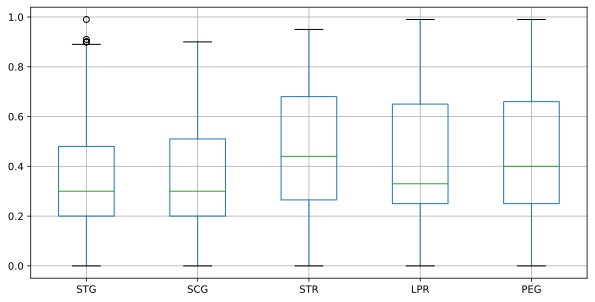

In [12]:
df_user.boxplot(column=numerical_col_user)

По "ящику с усами" пожно увидеть наличие выбросов по STG

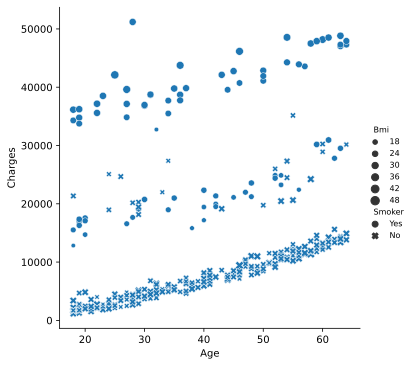

In [18]:
df_ins = pd.read_csv('../data/insurance_preprocessed.csv')
mapping = { 1: 'Yes', 
            0: 'No' }
cols = ['age','smoker','charges']
df_ins['smoker'] =df_ins['smoker'].map(mapping)

data = {
    'Age': df_ins['age'],
    'Smoker': df_ins['smoker'],
    'Charges':df_ins['charges'],
    'Children': df_ins['children'],
    'Bmi': df_ins['bmi'],
    'Sex': df_ins['sex']
}

df = pd.DataFrame.from_records(data)
df.head()
sns.relplot(data=df, x="Age", y="Charges", style="Smoker", size='Bmi')

На графике четко видно, что стоймость страховки стремительно возрастает при наличии лишнего веса и привычки курения, а также зависит прямопропорционально возрасту